In [1]:
import numpy as np
import pandas as pd

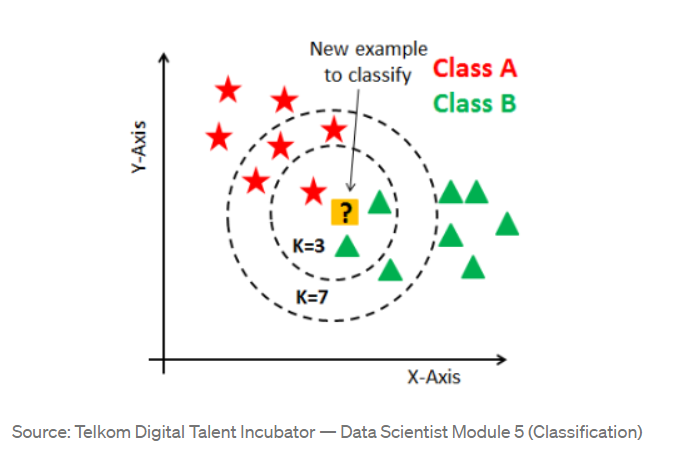

In [4]:
path=r"C:\Users\serhat.tadik\Downloads\knn.png"
Image(data = path, width=700)

In [2]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')

In [3]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df_bank.drop(columns = "duration", inplace=True)
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


### Encode Categorical Data

In [5]:
from sklearn.preprocessing import OneHotEncoder

cat_feature = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
encoder = OneHotEncoder(sparse=False)
df_bank_new = pd.DataFrame(encoder.fit_transform(df_bank[cat_feature]))
df_bank_new.columns = encoder.get_feature_names(cat_feature)
df_bank_new

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
df_bank.drop(columns = cat_feature, inplace=True)
df_bank = pd.concat([df_bank_new, df_bank], axis=1)
df_bank

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,59,2343,5,1,-1,0,yes
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,56,45,5,1,-1,0,yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,41,1270,5,1,-1,0,yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,55,2476,5,1,-1,0,yes
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54,184,5,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33,1,20,1,-1,0,no
11158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,39,733,16,4,-1,0,no
11159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,32,29,19,2,-1,0,no
11160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,43,0,8,2,172,5,no


In [7]:
df_bank["deposit"] = df_bank["deposit"].apply(lambda x: 1 if x=="yes" else 0)
df_bank

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,59,2343,5,1,-1,0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,56,45,5,1,-1,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,41,1270,5,1,-1,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,55,2476,5,1,-1,0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54,184,5,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33,1,20,1,-1,0,0
11158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,39,733,16,4,-1,0,0
11159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,32,29,19,2,-1,0,0
11160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,43,0,8,2,172,5,0


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_feat = ["age","balance","pdays","previous","day","campaign"]

df_bank_ready = pd.DataFrame(scaler.fit_transform(df_bank[num_feat]))
df_bank_ready.columns = num_feat
df_bank_ready

,age,balance,pdays,previous,day,campaign
0,1.491505,0.252525,-0.481184,-0.363260,-1.265746,-0.554168
1,1.239676,-0.459974,-0.481184,-0.363260,-1.265746,-0.554168
2,-0.019470,-0.080160,-0.481184,-0.363260,-1.265746,-0.554168
3,1.155733,0.293762,-0.481184,-0.363260,-1.265746,-0.554168
4,1.071790,-0.416876,-0.481184,-0.363260,-1.265746,-0.186785
...,...,...,...,...,...,...
11157,-0.691015,-0.473616,-0.481184,-0.363260,0.515650,-0.554168
11158,-0.187357,-0.246658,-0.481184,-0.363260,0.040612,0.547981
11159,-0.774958,-0.464934,-0.481184,-0.363260,0.396891,-0.186785
11160,0.148416,-0.473926,1.109571,1.818332,-0.909466,-0.186785


In [9]:
df_bank.drop(columns = num_feat, inplace=True)
df_bank_ready = pd.concat([df_bank_ready, df_bank], axis=1)
df_bank_ready

,age,balance,pdays,previous,day,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,1.491505,0.252525,-0.481184,-0.363260,-1.265746,-0.554168,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1.239676,-0.459974,-0.481184,-0.363260,-1.265746,-0.554168,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,-0.019470,-0.080160,-0.481184,-0.363260,-1.265746,-0.554168,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1.155733,0.293762,-0.481184,-0.363260,-1.265746,-0.554168,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1.071790,-0.416876,-0.481184,-0.363260,-1.265746,-0.186785,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,-0.481184,-0.363260,0.515650,-0.554168,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
11158,-0.187357,-0.246658,-0.481184,-0.363260,0.040612,0.547981,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
11159,-0.774958,-0.464934,-0.481184,-0.363260,0.396891,-0.186785,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
11160,0.148416,-0.473926,1.109571,1.818332,-0.909466,-0.186785,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [25]:
from sklearn.model_selection import train_test_split
# Select Features
feature = df_bank_ready.drop('deposit', axis=1)

# Select Target
target = df_bank_ready['deposit']

X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle = False, test_size = 0.002, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(11139, 50)
(23, 50)
(11139,)
(23,)
        age   balance     pdays  previous       day  campaign  job_admin.  \
0  1.491505  0.252525 -0.481184  -0.36326 -1.265746 -0.554168         1.0   
1  1.239676 -0.459974 -0.481184  -0.36326 -1.265746 -0.554168         1.0   
2 -0.019470 -0.080160 -0.481184  -0.36326 -1.265746 -0.554168         0.0   
3  1.155733  0.293762 -0.481184  -0.36326 -1.265746 -0.554168         0.0   
4  1.071790 -0.416876 -0.481184  -0.36326 -1.265746 -0.186785         1.0   
5  0.064473 -0.473926 -0.481184  -0.36326 -1.265746 -0.186785         0.0   
6  1.239676 -0.216583 -0.481184  -0.36326 -1.146986 -0.554168         0.0   
7  1.575448 -0.304948 -0.481184  -0.36326 -1.146986 -0.554168         0.0   
8 -0.355243 -0.473616 -0.481184  -0.36326 -1.146986 -0.554168         0.0   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0              0.0               0.0            0.0  ...        0.0   
1              0.0               0.0            0.0

In [26]:
print(type(X_test.iloc[0,0]))

<class 'numpy.float64'>


In [27]:
def distance(v1, v2):
    return np.linalg.norm(v1-v2)


In [28]:
dist_mat = np.zeros((X_test.shape[0],X_train.shape[0]))
for i in range(X_test.shape[0]):
    for j in range(X_train.shape[0]):
        dist_mat[i,j] = distance(X_test.iloc[i,:],X_train.iloc[j,:])



In [29]:
dist_mat

array([[5.0613504 , 4.80340666, 4.55039406, ..., 4.31321599, 3.80500488,
        3.56535689],
       [6.79183977, 6.96080762, 6.88996453, ..., 7.39619434, 6.43113863,
        5.33079914],
       [3.12357525, 3.1950771 , 2.20108357, ..., 2.86357413, 3.34367324,
        3.8712865 ],
       ...,
       [4.3070793 , 3.86757072, 3.40853963, ..., 3.13825849, 3.50237798,
        3.05057654],
       [4.45907701, 4.09179558, 3.96673484, ..., 4.73703499, 4.27088628,
        5.09400087],
       [3.62731549, 3.10424439, 2.59345115, ..., 3.17451127, 3.19906603,
        3.80778802]])

In [30]:
a = np.array([11,9,13,2,8,7])
a.argsort()

array([3, 5, 4, 1, 0, 2], dtype=int64)

In [31]:
k = 3
nearest_neighbor_ids = np.zeros((X_test.shape[0],k),dtype=int)
for i in range(X_test.shape[0]):
    nearest_neighbor_ids[i,:] = dist_mat[i,:].argsort()[:k]
nearest_neighbor_ids

array([[10000,  8858,  9742],
       [  187,  7644,  8234],
       [ 1854,  6623,  1793],
       [ 6342,  5780,  7001],
       [11006,  7336,   512],
       [10249,  6018,  9118],
       [ 3513,  5824,  5826],
       [ 9234,  4882,  4831],
       [ 7384,  6348,  1064],
       [ 8866,  9433,    11],
       [ 5515, 10608,  4496],
       [ 9377, 10324, 10013],
       [ 6228,  8785,  9711],
       [ 7136, 11042, 10824],
       [  929,   937,  4113],
       [ 6929,  9606,  5217],
       [ 1008,  7083,  9464],
       [  417,   367,  4602],
       [ 7464,  1030,  5812],
       [10709, 10316,  5798],
       [ 7028,   831,  8798],
       [ 3157,  5470,  1762],
       [  395,  8677,  6509]])

In [32]:
from statistics import mode

y_pred = np.zeros((y_test.shape[0],))
print(y_pred.shape)
for i in range(X_test.shape[0]):
    y_pred[i] = mode(y_train[nearest_neighbor_ids[i,:]])

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

(23,)


0.782608695652174

### kNN in Sklearn

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = 3
clf = KNeighborsClassifier(n_neighbors = neighbor)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.782608695652174